In [ ]:
"""
" Some of these functions were taken from 
https://github.com/ESSS/kraken-macros/blob/master/src/macros/mbal/mbalcore/mbal_functions.py
"""
import numpy as np

def formation_total_volume_factor(Bo, Bg, Rsb, Rs):

    return np.where(Rs >= Rsb, Bo, Bo + Bg*(Rsb - Rs))

def formation_volume_factor_gas_from_z(z, Tres, Psc, P, Tsc):
    Bg = z*(1000/5.615)*(Tres+460)*Psc/(P*(Tsc+460))
    return Bg
    
    
def production_injection_balance(Np, Bt, Rs, Rsi, Bg, Wp, Bw, Winj, Bwinj, Ginj, Bginj, Gp):

    produced_oil_and_gas = (Np * (Bt + (Gp/Np - Rsi) * Bg))
    produced_water = Wp * Bw
    injected_water = Winj * Bwinj
    injected_gas = Ginj * Bginj

    F = (produced_oil_and_gas + produced_water - injected_water - injected_gas)
    
    return F, produced_oil_and_gas, produced_water, injected_gas, injected_water

def dissolved_oil_and_gas_expansion(Bt, Bti):
    
    Eo = (Bt - Bti)
    
    return Eo

def dissolved_oil_and_gas_expansion2(Bo, Boi, Rsi, Bg, Rs):
    
    Eo = (Bo - Boi + Bg*(Rsi-Rs))
    
    return Eo

def gas_cap_expansion(Bti, Bg, Bgi):
    
    Eg = ((Bg/Bgi) - 1)
    
    return Eg

def deltaP(Pi, Pavg):
    
    deltaP = Pi - Pavg
    
    return deltaP

def pore_volume_reduction_connate_water_expansion(m , Boi, cw, Swi, cf, deltaP):
    
    Efw = ((cw*Swi+cf)/(1.0-Swi))*deltaP
    
    return Efw

def oil_in_place(F, Eo, m, Eg, Efw, We, Bw):
    
    oil_in_place = (F - We*Bw)/(Eo + (Bti)*m*Eg + (1.0 + m)*Bti*Efw)
    
    return oil_in_place

def oil_in_place_underg_withdrawal(F, Eo):

    oil_in_place_underg_withdrawal = F/Eo


    return oil_in_place_underg_withdrawal

def oil_in_place_gas_cap(F, Eo, m, Eg):

    oil_in_place_gas_cap = F/(Eo + (Bti)*m*Eg)

def oil_in_place_water_influx (F, We, Eo):

    oil_in_place_water_influx = (F - We)/Eo

    return oil_in_place_water_influx


In [2]:
'''
These function were partly copied from:
https://github.com/ESSS/kraken-macros/blob/master/src/macros/mbal/mbalcore/average_pressure.py
'''
import numpy as np

def pressure_drop(Pi, BHP):
    delta_Pressure = Pi - BHP
    return delta_Pressure

def productivity_index(opr, delta_Pressure):
    J = opr/delta_Pressure
    return J 

def reservoir_pressure(BHP, opr, J):
    Ps = BHP + opr/J
    return Ps

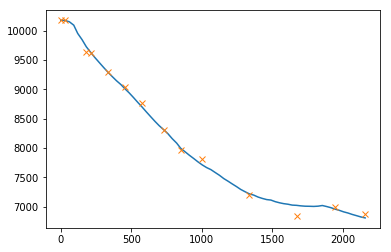

In [8]:
from scipy import optimize
from scipy.optimize import minimize
from scipy.optimize import fsolve
from scipy.optimize import newton

#####Material Balance
ts = np.array([0,30,61,92,120,151,181,212,242,273,304,334,365,395,426,457,485,516,546,577,607,638,669,699,730,760,791,822,851,882,912,943,973,1004,1035,1065,1096,1126,1157,1188,1216,1247,1277,1308,1338,1369,1400,1430,1461,1491,1522,1553,1581,1612,1642,1673,1703,1734,1765,1795,1826,1856,1887,1918,1946,1977,2007,2038,2068,2099,2130,2160])
Np = np.array([0,4000,28000,100000,186000,285000,374000,444000,513000,582000,652000,722000,791000,857000,924000,995000,1059000,1133000,1213000,1296000,1380000,1466000,1550000,1637000,1720000,1805000,1891000,1980000,2060000,2147000,2229000,2310000,2388000,2462000,2531000,2590000,2662000,2728000,2798000,2863000,2920000,2982000,3044000,3103000,3158000,3211000,3261000,3310000,3358000,3405000,3452000,3500000,3540000,3584000,3624000,3662000,3700000,3737000,3774000,3810000,3844000,3873000,3917000,3971000,4028000,4086000,4147000,4206000,4265000,4324000,4383000,4438000])
Gp = np.array([0,3000,21000,56000,229000,338000,486000,612000,733000,851000,970000,1080000,1192000,1298000,1396000,1515000,1623000,1758000,1890000,2022000,2158000,2297000,2442000,2572000,2696000,2822000,2961000,3073000,3216000,3357000,3497000,3633000,3764000,3899000,4025000,4135000,4265000,4392000,4536000,4661000,4781000,4909000,5036000,5154000,5269000,5354000,5477000,5573000,5669000,5736000,5848000,5940000,6018000,6091000,6179000,6251000,6321000,6392000,6462000,6528000,6592000,6648000,6743000,6847000,6944000,7050000,7156000,7256000,7357000,7458000,7558000,7651000])
Gp = Gp*1000.0
Wp = np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1000,5000,14000,21000,27000,33000,42000,52000,65000,79000,93000,110000,129000,146000,162000,180000,196000,213000,229000,245000,263000,282000,300000,321000,340000,358000,381000,403000,419000,437000,451000,461000,478000,486000,493000,499000,506000,514000,525000,535000,547000,556000])
reservoir_pressure_obs = np.array([10180,10178,None,None,None,None,9643,9617.5,None,None,None,9293,None,None,None,9040,None,None,None,8777.5,None,None,None,None,8315,None,None,None,7962,None,None,None,None,7819,None,None,None,None,None,None,None,None,None,None,7202,None,None,None,None,None,None,None,None,None,None,6839,None,None,None,None,None,None,None,None,6991.7,None,None,None,None,None,None,6876.7])
ts_obs = ts[np.where(reservoir_pressure_obs != None)]
ts_obs = ts_obs*1.0
Np_obs = Np[np.where(reservoir_pressure_obs != None)]
Gp_obs = Gp[np.where(reservoir_pressure_obs != None)]
Wp_obs = Wp[np.where(reservoir_pressure_obs != None)]
We = [None]*len(Np)
Pres_calc = []
#We = np.array([0,59.95299544,553.4584738,2348.970294,6862.159938,15829.47937,28011.73424,43998.31742,62229.95118,83740.26438,107820.9585,133481.3475,162286.6933,192251.6232,225166.8362,260089.5611,293455.859,332479.9599,372492.296,416141.4673,460623.2217,508916.6555,559477.4782,610473.5742,665060.3796,719782.4377,778672.7057,839807.5945,898721.0522,963353.5695,1027403.335,1095063.349,1161932.225,1232381.415,1303963.188,1374033.906,1447332.17,1519322.22,1594899.594,1671617.784,1741769.517,1820389.432,1897446.544,1977979.017,2056613.776,2138292.127,2220358.667,2300215.287,2382960.038,2463017.696,2545858.339,2628997.358,2704182.23,2787372.554,2867838.7,2950863.268,3030990.48,3113586.432,3195861.34,3275134.181,3356609.123,3434824.46,3515361.342,3596125.554,3669390.501,3750873.375,3830097.948,3912324.939,3992235.196,4075178.912,4158448.494,4239274.831])
#We_obs = We[np.where(reservoir_pressure_obs != None)]
reservoir_pressure_calc_excel = np.array([10180,10175.99091,10152.04503,10091.52418,9944.228869,9832.612455,9706.308624,9607.634242,9515.291653,9427.222063,9340.177747,9259.99518,9181.370871,9108.776925,9042.6675,8965.447792,8898.536912,8816.330266,8732.64002,8650.709226,8565.321972,8481.563961,8398.911599,8323.136068,8255.424142,8174.473314,8081.056479,8005.221463,7937.805215,7873.222724,7811.461519,7751.22759,7691.309161,7636.084496,7589.321523,7554.042533,7502.591392,7454.046135,7395.922502,7349.437536,7304.745109,7257.729913,7208.161945,7167.140732,7129.082625,7107.246012,7070.699621,7045.120257,7022.9965,7013.168641,6982.448855,6960.125029,6943.677099,6931.106816,6913.065798,6905.804962,6894.458853,6885.716505,6881.603728,6876.029118,6877.282615,6885.609462,6863.387597,6838.102088,6809.414172,6782.843013,6752.016582,6726.641376,6696.623135,6669.626099,6641.758426,6620.025874])
reservoir_pressure_obs = reservoir_pressure_obs[np.where(reservoir_pressure_obs != None)]
reservoir_pressure_obs = reservoir_pressure_obs*1.0
reservoir_pressure_obs = np.array([10180.0,10178.0,9643.0,9617.5,9293.0,9040.0,8777.5,8315.0,7962.0,7819.0,7202.0,6839.0,6991.7,6876.7])

Swi = 0.2
cw = 2.50E-06
cf = 3.00E-05
#N = 1.00E+07
#Wei = 5.00E+07
J = .93
m = 0
#We = 0
Winj = 0
Ginj = 0
#####General PVT
Tsc = 60 #F
Psc = 15.025 #psia
Tres = 219 #F
Pbp = 8227 #psia
Rsi = 1720 #scf/stb
Boi = 1.7349
Pi = 10180
Bgi = 0.650766195/1000
Rsb = 1720
Bti = formation_total_volume_factor(Boi, Bgi, Rsb, Rsi)
#####Water PVT
Bw = 1.0
Bwinj = 1.0
#####Oil PVT
pvt_oil_pressure = np.array([1600,2400,3200,4000,4800,5600,6400,7200,8000,8227,8500,9000,9500,9640,10000,10180,10360])
pvt_oil_Bo = np.array([1.1165,1.1516,1.1878,1.2233,1.2821,1.346,1.4264,1.53,1.693,1.7798,1.7716,1.7586,1.748,1.745,1.738,1.7349,1.7319])
pvt_oil_Rs = np.array([233,343,456,576,714,862,1041,1260,1580,1720,1720,1720,1720,1720,1720,1720,1720])
#Bg in rb/mscf
pvt_oil_Bg = np.array([2.035293579,1.339392066,1.024198174,0.848184586,0.741033256,0.677599311,0.638759017,0.627961397,0.63329953,0.635551691,0.638100908,0.642368796,0.646187432,0.647185665,0.649624206,0.650766195,0.652])
pvt_oil_Bg = pvt_oil_Bg/1000
pvt_oil_Bt = formation_total_volume_factor(pvt_oil_Bo, pvt_oil_Bg, Rsb, pvt_oil_Rs)
#print(pvt_oil_Bt)
#####Gas PVT
pvt_gas_pressure = np.array([400,800,1600,2400,3200,4000,4800,5600,6400,7200,8000,8227])
pvt_gas_z = np.array([0.979,0.96,0.932,0.92,0.938,0.971,1.018,1.086,1.17,1.294,1.45,1.496446619])
pvt_gas_Bg = formation_volume_factor_gas_from_z(pvt_gas_z, Tres, Psc, pvt_gas_pressure, Tsc)


aquifer_pres = [None]*len(Np)


def aquifer_pressure(step, Wei):
    We_prev =  We[step-1]
    if step == 1:
        aq_pres = Pi
    else:
        aq_pres = Pi*(1-We_prev/(Wei))
    aquifer_pres[step] = aq_pres
    return aq_pres


def aquifer_influx(step,P, Wei):
    We_prev =  We[step-1]
    ts_prev = ts[step-1]
    tsx = ts[step]
    avg_pres = (Pres_calc[step-1] + P)/2
    aq_pres = aquifer_pressure(step, Wei)
    #print(step,aq_pres)
    Wex = We_prev + (Wei/Pi)*(aq_pres - avg_pres) * (1 - np.exp(-J * Pi * (tsx-ts_prev) / Wei))
    return Wex
    
    
def mbal_step(P, Np, Wp, Gp, We):
    Bo = np.interp(P, pvt_oil_pressure, pvt_oil_Bo)
    #print(Bo, P)
    Bg = np.interp(P, pvt_oil_pressure, pvt_oil_Bg)
    Bginj = Bg
    Rs = np.interp(P, pvt_oil_pressure, pvt_oil_Rs)
    Bt = formation_total_volume_factor(Bo, Bg, Rsb, Rs)
    #print("Bt = ", Bt)
    Eo = dissolved_oil_and_gas_expansion(Bt, Bti)
    Eg = gas_cap_expansion(Bti, Bg, Bgi)
    dP = Pi - P
    Efw = pore_volume_reduction_connate_water_expansion(m, Boi, cw, Swi, cf, dP)
    F, produced_oil_and_gas, produced_water, injected_gas, injected_water = production_injection_balance(Np, Bt, Rs, Rsi, Bg, Wp, Bw, Winj, Bwinj, Ginj, Bginj, Gp)
    Ncalc = oil_in_place(F, Eo, m, Eg, Efw, We, Bw)
    of = (N - Ncalc)
    #print(np.round(of,2), np.round(P,0), np.round(F,2), np.round(Eo,4), np.round(Efw,4), Eg, Bt, Bg, Ncalc)
    return Ncalc, Eo, Efw, Eg, F
    #res = optimize.newton(oil_in_place, x0, args=(y,))
    

def obj_funtion(P, *data):
    Npx = data[0]
    Wpx = data[1]
    #Wex = data[2]
    Gpx = data[2]
    N = data[3]
    step = data[4]
    Wei = data[5]
    Bo = np.interp(P, pvt_oil_pressure, pvt_oil_Bo)
    #print(Bo, P)
    Bg = np.interp(P, pvt_oil_pressure, pvt_oil_Bg)
    Bginj = Bg
    Rs = np.interp(P, pvt_oil_pressure, pvt_oil_Rs)
    Bt = formation_total_volume_factor(Bo, Bg, Rsb, Rs)
    #print("Bt = ", Bt)
    Eo = dissolved_oil_and_gas_expansion(Bt, Bti)
    Eg = gas_cap_expansion(Bti, Bg, Bgi)
    dP = Pi - P
    Wex = 0.0
    Efw = pore_volume_reduction_connate_water_expansion(m, Boi, cw, Swi, cf, dP)
    F, produced_oil_and_gas, produced_water, injected_gas, injected_water = production_injection_balance(Npx, Bt, Rs, Rsi, Bg, Wpx, Bw, Winj, Bwinj, Ginj, Bginj, Gpx)
    Wex = aquifer_influx(step,P,Wei)[0]         
    We[step] = Wex
    
    Ncalc = oil_in_place(F, Eo, m, Eg, Efw, Wex, Bw)
    of = (N - Ncalc)
    return of
    
def pressure_calculation(data):
    step = data[4]
    x0 = Pres_calc[step-1] - 10.0
    res = fsolve(obj_funtion, x0, args = data)
    return res
    

def eval_mbal_input(N_guess, Wei_guess):
    N = N_guess
    Wei = Wei_guess
    for x in range(len(Np)):
        if x == 0:
            Pres_calc.append(Pi)
            We[x] = 0.0
            aquifer_pres[0] = Pi
        else:
            data = (Np[x], Wp[x], Gp[x], N, x, Wei)
            Pres_calc.append(pressure_calculation(data)[0])
    return Pres_calc


Pres_calc = eval_mbal_input(1.37205853e+07, 1.64096023e+08)


import matplotlib.pyplot as plt

plt.plot(ts, Pres_calc, '-')
plt.plot(ts_obs, reservoir_pressure_obs, 'x')
plt.show()





In [6]:
x = reservoir_pressure_calc_excel
Ncalc, Eo, Efw, Eg, F = mbal_step(x, Np, Wp, Gp, We)
#print('N calc, Eo, Efw, Eg, F')
#print(Ncalc, Eo, Efw, Eg, F)
#>>> xvals = np.linspace(0, 2*np.pi, 50)
#>>> yinterp = np.interp(xvals, x, y)
#import matplotlib.pyplot as plt
#plt.plot(x, y, 'o')
#>>> plt.plot(xvals, yinterp, '-x')
#[<matplotlib.lines.Line2D object at 0x...>]
#plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide


TypeError: can't multiply sequence by non-int of type 'float'

In [7]:
from scipy.optimize import curve_fit

def fit_mbal_input(ts_obs, N_guess, Wei_guess):
    Pres_calc2 = []
    Pres_calc.clear()
    Pres_calc2 = eval_mbal_input(N_guess, Wei_guess)
    Pres_calc_obs = []   
    for x in range(len(ts_obs)):       
        Pres_calc_obs.append(np.interp(ts_obs[x], ts, Pres_calc2))
    return Pres_calc_obs

popt, pcov = curve_fit(fit_mbal_input, ts_obs, reservoir_pressure_obs, bounds=([5000000.0, 10E6], [30000000.0, 300E6]))
sd = np.sqrt(np.diag(pcov))
print(popt , sd)

[1.37205853e+07 1.64096023e+08] [3.29094668e+05 1.22653786e+08]


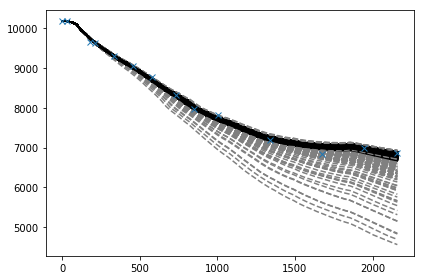

In [9]:
import matplotlib.pyplot as plt
import scipy.stats as stats
np.random.seed=1234
n = 1000
Ns = np.random.normal(popt[0],sd[0],n)
Weis = stats.truncnorm((0-popt[1])/sd[1], (popt[1]+2*sd[1]-popt[1])/sd[1], loc=popt[1], scale = sd[1])
Weis = Weis.rvs(n)
case_match = []
case_match.clear()
#print(Weis)
for x in range(len(Ns)):
    Pres_calc_obs = []
    Pres_calc.clear()
    Pres_calc = eval_mbal_input(Ns[x], Weis[x])
    err = []
    err.clear()
    
    for x in range(len(ts_obs)):       
        Pres_calc_obs.append(np.interp(ts_obs[x], ts, Pres_calc))
        err.append(np.abs(Pres_calc_obs[x] - reservoir_pressure_obs[x]))
    err = np.sum(err)/(len(ts_obs)*np.std(Pres_calc_obs))   
    #print(err)
    if err > 0.05:
        plt.plot(ts, Pres_calc, '--', color='grey')
        case_match.append(-1.0)
    else:    
        plt.plot(ts, Pres_calc, '-', color='black')
        case_match.append(1.0)
Ns_accept = Ns[np.where(np.asarray(case_match) >= 0)]
Ns_reject = Ns[np.where(np.asarray(case_match) <= 0)]
Weis_accept = Weis[np.where(np.asarray(case_match) == 1)]
Weis_reject = Weis[np.where(np.asarray(case_match) == -1)]
plt.plot(ts_obs, reservoir_pressure_obs, 'x')
plt.tight_layout()
plt.show()

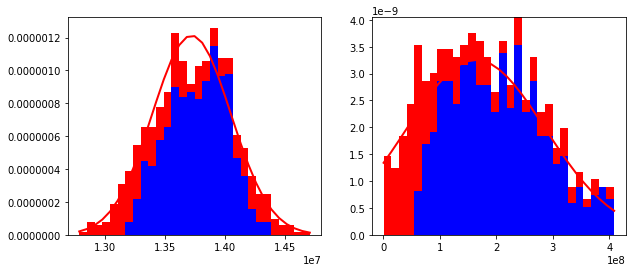

In [10]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,4))

count, bins, ignored = ax1.hist([Ns_accept, Ns_reject], 30, stacked = True,  density=True , color = ['blue','red'])
ax1.plot(bins, 1/(sd[0] * np.sqrt(2 * np.pi)) * np.exp( - (bins - popt[0])**2 / (2 * sd[0]**2) ), linewidth=2, color='r')

count, bins, ignored = ax2.hist([Weis_accept, Weis_reject], 30, stacked = True, density=True , color = ['blue','red'])
ax2.plot(bins, 1/(sd[1] * np.sqrt(2 * np.pi)) * np.exp( - (bins - popt[1])**2 / (2 * sd[1]**2) ), linewidth=2, color='r')


[4357.9228117847315, 4357.5519765549325, 4355.327968832578, 4349.662596539261, 4335.4201010667275, 4324.263418146114, 4311.214959358295, 4300.587348301309, 4290.4491909165135, 4280.508367132091, 4270.397110783296, 4260.780372033719, 4251.164793438507, 4242.071881560395, 4233.584873643506, 4223.284442249095, 4214.342119055665, 4203.123726638372, 4191.467236733933, 4179.652906506068, 4167.199641224059, 4154.423319144516, 4141.521261752767, 4129.500604416248, 4118.476930269475, 4106.817107181631, 4091.822997971366, 4078.4678360045286, 4061.984939822953, 4050.692721564711, 4039.424390989596, 4028.358876978948, 4016.9322962887427, 4006.0415941412725, 3996.5664621542064, 3989.272293096318, 3978.5581484814734, 3968.2193058809344, 3955.573176369458, 3945.1874886550877, 3935.0103144289365, 3924.0843508521816, 3912.4306617293873, 3902.902641240464, 3893.9319209840096, 3888.7589019848206, 3880.305290511217, 3874.3814241738332, 3869.283114553323, 3867.162368483363, 3860.0080799772422, 3854.8843104

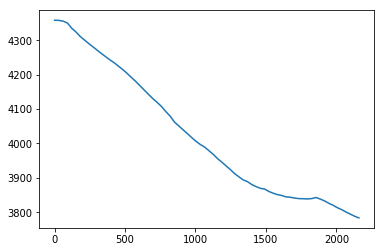

In [234]:
# Vogel Forecast
qo_max = 5000
Pwf =  3000
qo_array = []
def Vogel(P):
    term1 = 1 - 0.2*(Pwf/P) -0.8 * ((Pwf/P)**2)
    qo = qo_max * term1
    return qo

for x in range(len(Pres_calc)):
    qo_array.append(Vogel(Pres_calc[x]))
print(qo_array)
plt.plot(ts,qo_array)

In [246]:
# Forcast
ts = np.array([0,30,61,92,120,151,181,212,242,273,304,334,365,395,426,457,485,516,546,577,607,638,669,699,730,760,791,822,851,882,912,943,973,1004,1035,1065,1096,1126,1157,1188,1216,1247,1277,1308,1338,1369,1400,1430,1461,1491,1522,1553,1581,1612,1642,1673,1703,1734,1765,1795,1826,1856,1887,1918,1946,1977,2007,2038,2068,2099,2130,2160])

n_wells = 5
qo_max = [5000]*n_wells
Pwf =  [3000]*n_wells
n_months = 60
ts_pred = [30.5]*n_months
ts_pred = np.cumsum(ts)

for x in range(len(ts_pred)):
    



[    0    30    91   183   303   454   635   847  1089  1362  1666  2000
  2365  2760  3186  3643  4128  4644  5190  5767  6374  7012  7681  8380
  9110  9870 10661 11483 12334 13216 14128 15071 16044 17048 18083 19148
 20244 21370 22527 23715 24931 26178 27455 28763 30101 31470 32870 34300
 35761 37252 38774 40327 41908 43520 45162 46835 48538 50272 52037 53832
 55658 57514 59401 61319 63265 65242 67249 69287 71355 73454 75584 77744] 2160


In [173]:
zzz = np.random.randn(1000, 2)
print (zzz)

[[-1.37313813 -0.1382998 ]
 [-0.77847982  1.27805616]
 [ 0.57867261  0.40371528]
 ...
 [-0.66237796 -1.3861137 ]
 [-1.69374746 -1.62768471]
 [ 0.03594411  0.63705396]]


In [34]:
def lnlike(theta, x, y, yerr):
    m, b, lnf = theta
    model = m * x + b
    inv_sigma2 = 1.0/(yerr**2 + model**2*np.exp(2*lnf))
    return -0.5*(np.sum((y-model)**2*inv_sigma2 - np.log(inv_sigma2)))